In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("heart.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
print("Features : {}".format(data.columns[:-1].values))

print("Total number of Features : {}".format(len(data.columns)))

print("Target Variable : {}".format(data.columns[-1]))

print("Total No of samples present in dataset : {}".format(len(data)))

print("Our Decision Tree will classify if the sample belongs to class {} or {}".format(data.target.unique()[0],data.target.unique()[1]))

Features : ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']
Total number of Features : 14
Target Variable : target
Total No of samples present in dataset : 303
Our Decision Tree will classify if the sample belongs to class 1 or 0


In [33]:
# Lets visualize our data now

Text(0.5, 1.0, 'Age Distribution')

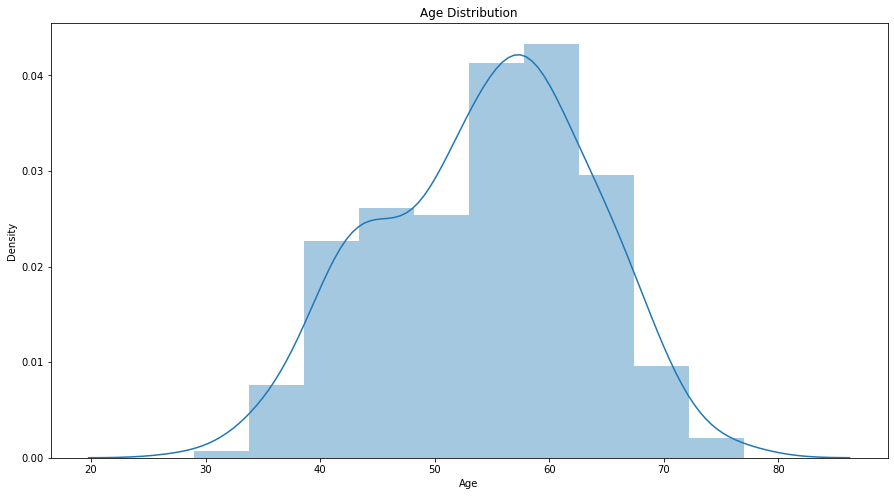

In [48]:
# Age 
plt.figure(figsize=(15,8))

sns.distplot(data.age,bins=10)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution")


In [88]:
data[data.age<30]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [105]:
data[(data.age>29) & (data.age<=50)][data.target==0].count()


<ipython-input-105-8dbf609a9c3d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.age>29) & (data.age<=50)][data.target==0].count()


age         29
sex         29
cp          29
trestbps    29
chol        29
fbs         29
restecg     29
thalach     29
exang       29
oldpeak     29
slope       29
ca          29
thal        29
target      29
dtype: int64

In [104]:
data[(data.age>29) & (data.age<=50)][data.target==1].count()

<ipython-input-104-a32b32390ca3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.age>29) & (data.age<=50)][data.target==1].count()


age         65
sex         65
cp          65
trestbps    65
chol        65
fbs         65
restecg     65
thalach     65
exang       65
oldpeak     65
slope       65
ca          65
thal        65
target      65
dtype: int64

In [108]:
data[(data.age>50)][data.target==0].count()

<ipython-input-108-86070d609a07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.age>50)][data.target==0].count()


age         109
sex         109
cp          109
trestbps    109
chol        109
fbs         109
restecg     109
thalach     109
exang       109
oldpeak     109
slope       109
ca          109
thal        109
target      109
dtype: int64

In [109]:
data[(data.age>50)][data.target==1].count()

<ipython-input-109-9b8e403552dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.age>50)][data.target==1].count()


age         99
sex         99
cp          99
trestbps    99
chol        99
fbs         99
restecg     99
thalach     99
exang       99
oldpeak     99
slope       99
ca          99
thal        99
target      99
dtype: int64

In [111]:
# Observations

# Age seems to be normally distributed
#  there is only 1 case having age 29
# 65 cases if age is >29 and <=50
# 99 cases if age>50

In [115]:
# Gender
# 1 -> male 0 -> female

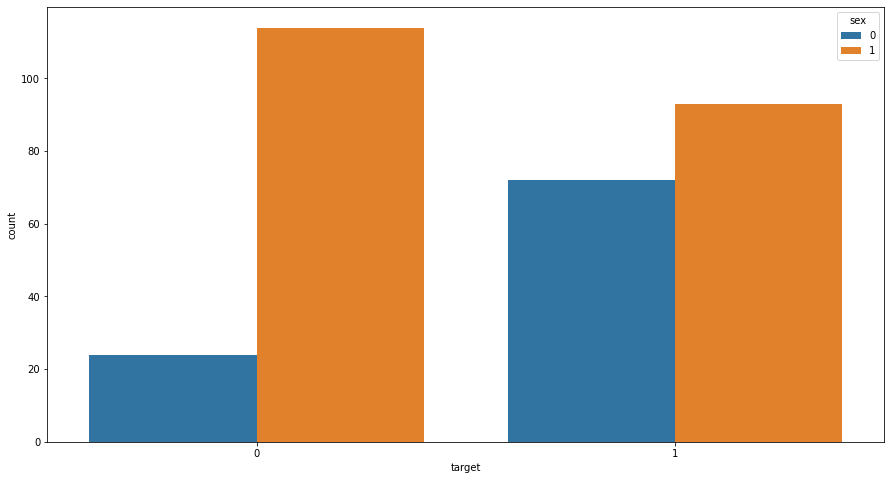

In [154]:
plt.figure(figsize=(15,8))

sns.countplot(data.target,hue=data.sex)

In [155]:
data.groupby(["sex"])["target"].count()

sex
0     96
1    207
Name: target, dtype: int64

In [156]:
female = data[data.sex==0]["age"].describe()
female

count    96.000000
mean     55.677083
std       9.409396
min      34.000000
25%      49.750000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64

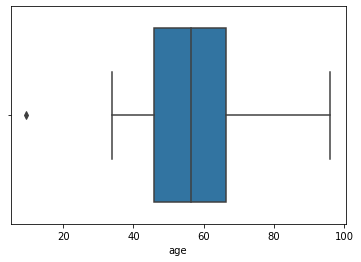

In [157]:
sns.boxplot(female)

In [158]:
male = data[data.sex==1]["age"].describe()
male

count    207.000000
mean      53.758454
std        8.883803
min       29.000000
25%       47.000000
50%       54.000000
75%       59.500000
max       77.000000
Name: age, dtype: float64

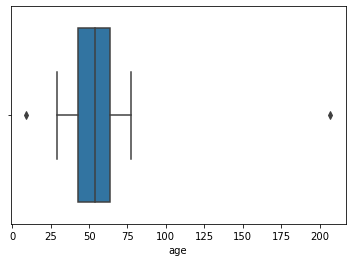

In [159]:
sns.boxplot(male)

In [205]:
len(data[(data.target==1) &(data.sex==0)])

72

In [206]:
len(data[(data.target==1) &(data.sex==1)])

93

In [161]:
# Observations

# no. of male = 207 female =96
# out of 207 male and 96 female, 93 male and 72 female are diagnosed positive 
#  risk of having disease for female ranges from age 34 to 76 and for male from age 29 to 77

In [162]:
# Chest Pain (CP)

In [188]:
data.groupby("cp")["target"].count()

cp
0    143
1     50
2     87
3     23
Name: target, dtype: int64

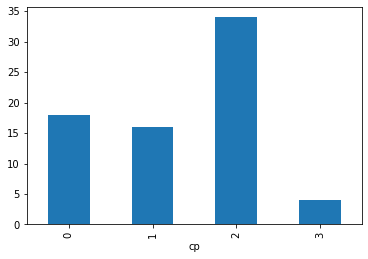

In [234]:
#plotting data for female having chest pain and diagnosed as +ve [cp wise].

data[(data.sex==0)&(data.target==1)].groupby("cp")["target"].count().plot(kind="bar")

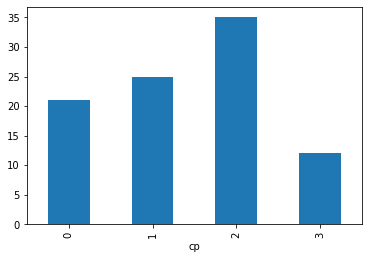

In [236]:
#plotting data for male having chest pain and diagnosed as +ve [cp wise].

data[(data.sex==1)&(data.target==1)].groupby("cp")["target"].count().plot(kind="bar")

In [239]:
data[(data.sex==0)&(data.target==1)].groupby("cp")["target"].count()

cp
0    18
1    16
2    34
3     4
Name: target, dtype: int64

In [240]:
data[(data.sex==1)&(data.target==1)].groupby("cp")["target"].count()

cp
0    21
1    25
2    35
3    12
Name: target, dtype: int64

In [241]:
# Observations

# for  72 +ve diagnosed female, 18,16,34,4 have cp of type 0,1,2,3 respectively
# for  93 +ve diagnosed female, 21,25,35,12 have cp of type 0,1,2,3 respectively

In [242]:
# Blood Pressure

In [243]:
data.trestbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [295]:
# avg blood pressure for female diagnose +ve 

data[(data.sex==0)&(data.target==1)]["trestbps"].mean()

128.73611111111111

In [251]:
# avg blood pressure for male diagnose +ve 

data[(data.sex==1)&(data.target==1)]["trestbps"].mean()

129.74193548387098

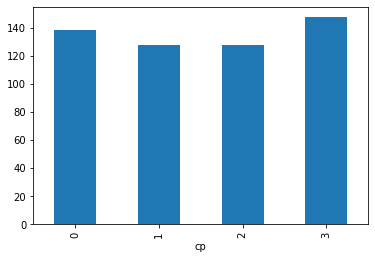

In [293]:
data[data.sex==0].groupby("cp")["trestbps"].mean().plot(kind="bar")

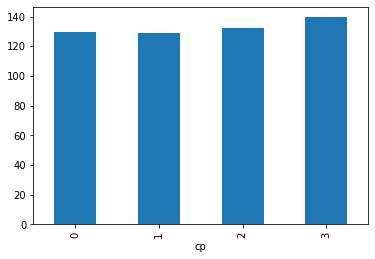

In [296]:
data[data.sex==1].groupby("cp")["trestbps"].mean().plot(kind="bar")

In [260]:
# Observations :

# avg BP for female and male diagnosed +ve is 128.73 and 129.74 resp
# for female, avg bp for cp type 0,1,2,3 is 138.58, 128.05, 127.88, 147.5 resp
# for male, avg bp for cp type 0,1,2,3 is 129.55,128.59,132.05,139.47 resp

In [261]:
# Cholestrol

In [270]:
data.chol.describe(percentiles=(0.3,0.4,0.5,0.6,0.7,0.75,0.85,0.9,1))

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
30%      217.600000
40%      230.000000
50%      240.000000
60%      254.000000
70%      268.000000
75%      274.500000
85%      298.700000
90%      308.800000
100%     564.000000
max      564.000000
Name: chol, dtype: float64

In [292]:
# For example, we will consider 130 md/dl as borderline 

print(data[data.chol<130])
print("\n\n Gender :",data[data.chol<130].sex.count())
# this shows only 1 patient is having cholestrol level under 130  (male)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
111   57    1   2       150   126    1        1      173      0      0.2   

     slope  ca  thal  target  
111      2   1     3       1  


 Gender : 1


In [ ]:
# Blood Sugar > 120

In [308]:
data[(data.target==1)&(data.fbs==1)].groupby("sex")["target"].count()

sex
0     6
1    17
Name: target, dtype: int64

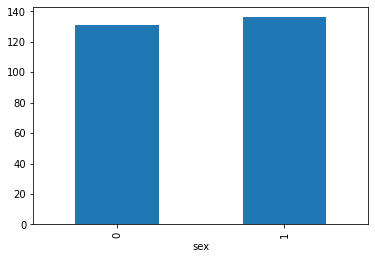

In [310]:
data[(data.target==1)&(data.fbs==1)].groupby("sex")["trestbps"].mean().plot(kind="bar")

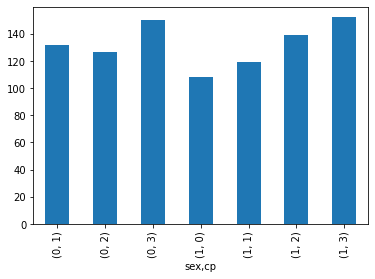

In [313]:
data[(data.target==1)&(data.fbs==1)].groupby(["sex","cp"])["trestbps"].mean().plot(kind="bar")

In [314]:
# Observations 

# out of +ve male and female, 6 female and 17 male have high sugar level
# avg BP for +ve male and female is 131.16 and 136.5 resp 

In [315]:
# Maximum Hear Rate

In [316]:
data.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

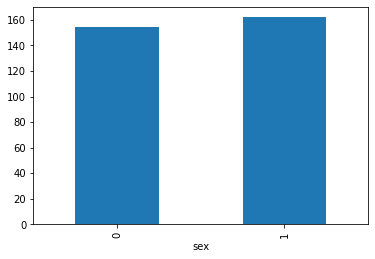

In [335]:
data[data.target==1].groupby("sex")["thalach"].mean().plot(kind="bar") 

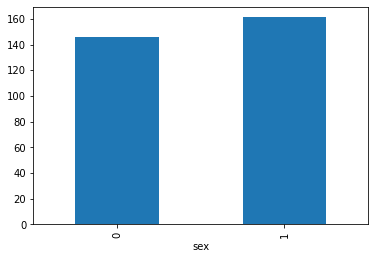

In [329]:
data[(data.target==1) & (data.fbs==1)].groupby("sex")["thalach"].mean().plot(kind="bar") 

In [331]:
data[(data.target==1) & (data.fbs==1)].groupby(["sex","cp"])["thalach"].mean()

sex  cp
0    1     159.00
     2     138.25
     3     162.00
1    0     147.00
     1     160.00
     2     165.40
     3     153.00
Name: thalach, dtype: float64

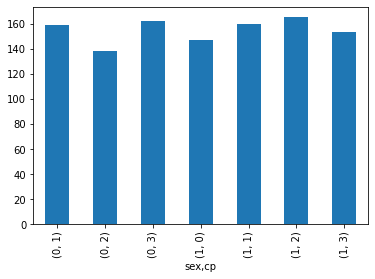

In [333]:
data[(data.target==1) & (data.fbs==1)].groupby(["sex","cp"])["thalach"].mean().plot(kind="bar")

In [336]:
# Observations

# avg high heart rate for male, female tested +ve is 154.02 161.90
# avg high heart rate for male, female tested +ve and having high blood sugar level is 145.66 161.17

In [337]:
# Now lets split our data

In [339]:
X = data.drop("target",axis=1)
Y = data["target"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [340]:
# Model building

In [342]:
DTREE = DecisionTreeClassifier(random_state=0)
DTREE.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(1076.5912500000002, 1445.9759999999999, 'ca <= 0.5\ngini = 0.496\nsamples = 212\nvalue = [97, 115]\nclass = Diasease'),
 Text(678.6675, 1293.768, 'thal <= 2.5\ngini = 0.381\nsamples = 129\nvalue = [33, 96]\nclass = Diasease'),
 Text(439.425, 1141.56, 'oldpeak <= 1.7\ngini = 0.18\nsamples = 90\nvalue = [9, 81]\nclass = Diasease'),
 Text(292.95000000000005, 989.352, 'trestbps <= 167.0\ngini = 0.094\nsamples = 81\nvalue = [4, 77]\nclass = Diasease'),
 Text(195.3, 837.1439999999999, 'age <= 60.5\ngini = 0.073\nsamples = 79\nvalue = [3, 76]\nclass = Diasease'),
 Text(117.18, 684.9359999999999, 'trestbps <= 109.0\ngini = 0.029\nsamples = 67\nvalue = [1, 66]\nclass = Diasease'),
 Text(78.12, 532.728, 'sex <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Diasease'),
 Text(39.06, 380.52, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Diasease'),
 Text(117.18, 380.52, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Disease'),
 Text(156.24, 532.728, 'gini = 0.0\nsamples = 6

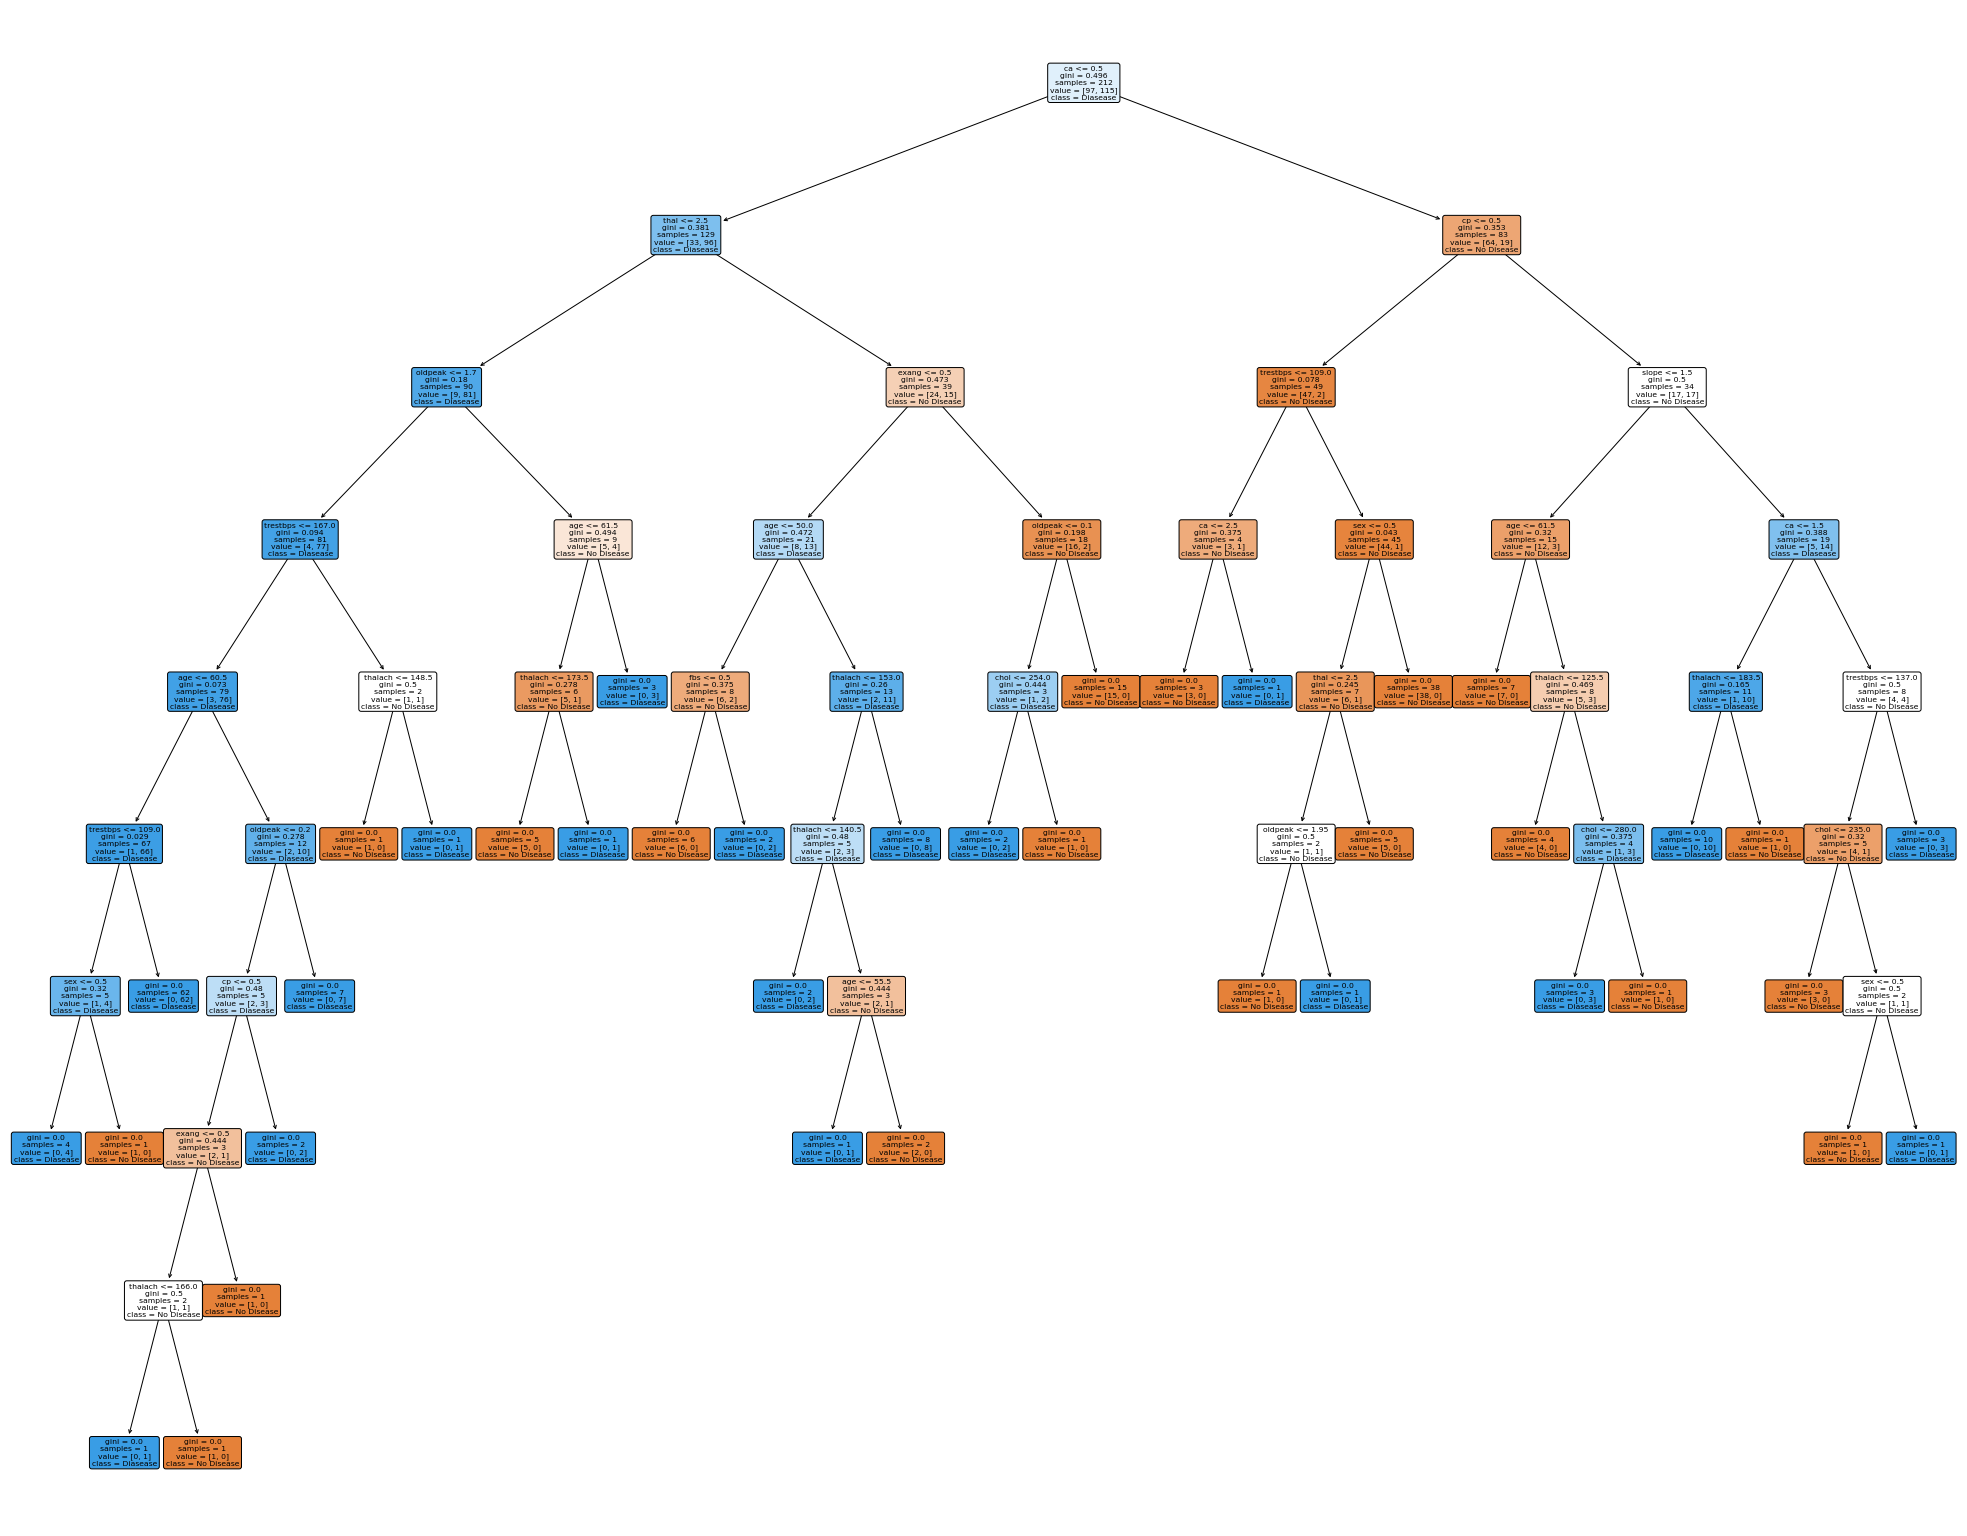

In [353]:
plt.figure(figsize=(35,28))

features = x_test.columns
classes = ["No Disease","Diasease"]
tree.plot_tree(DTREE,feature_names=features,class_names=classes,filled=True,rounded=True)

In [354]:
pred_on_train = DTREE.predict(x_train)
pred_on_test = DTREE.predict(x_test)

In [357]:
print("Accuracy on training set : {}".format(accuracy_score(y_train,pred_on_train)))
print("Accuracy on testing set : {}".format(accuracy_score(y_test,pred_on_test)))

Accuracy on training set : 1.0
Accuracy on testing set : 0.7252747252747253


Train Confusion Matrix


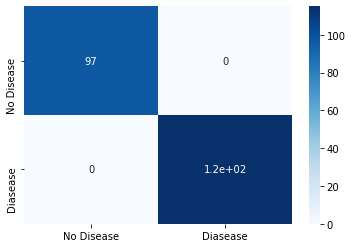

Test Confusion Matrix


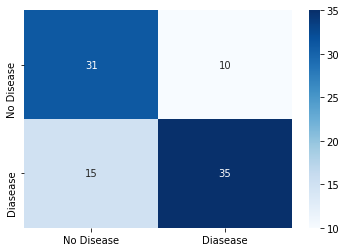

In [370]:
# confusion Matrix

cm_1 = confusion_matrix(y_test,pred_on_test)
cm_2 =confusion_matrix(y_train,pred_on_train)
print("Train Confusion Matrix")
sns.heatmap(cm_2,annot=True,yticklabels=classes,xticklabels=classes,cmap="Blues")
plt.show()

print("Test Confusion Matrix")
sns.heatmap(cm_1,annot=True,yticklabels=classes,xticklabels=classes,cmap="Blues")
plt.show()

In [366]:
# This is an Example of Overfitting